In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import torch

plt.style.use('seaborn-v0_8')

#フォント設定
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
#plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 50 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 15 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 15 # 軸だけ変更されます


#軸設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き
#plt.rcParams['axes.grid'] = True # グリッドの作成
#plt.rcParams['grid.linestyle']='--' #グリッドの線種
#plt.rcParams["xtick.minor.visible"] = True  #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True  #y軸補助目盛りの追加
#plt.rcParams['xtick.top'] = True  #x軸の上部目盛り
#plt.rcParams['ytick.right'] = True  #y軸の右部目盛り


#軸大きさ
plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10               #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10               #y軸主目盛り線の長さ#
plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["axes.linewidth"] = 1.0                #囲みの太さ


#凡例設定
plt.rcParams["legend.fancybox"] = False  # 丸角OFF
plt.rcParams["legend.framealpha"] = 1  # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
plt.rcParams["legend.markerscale"] = 20 #markerサイズの倍率


# multitasl

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

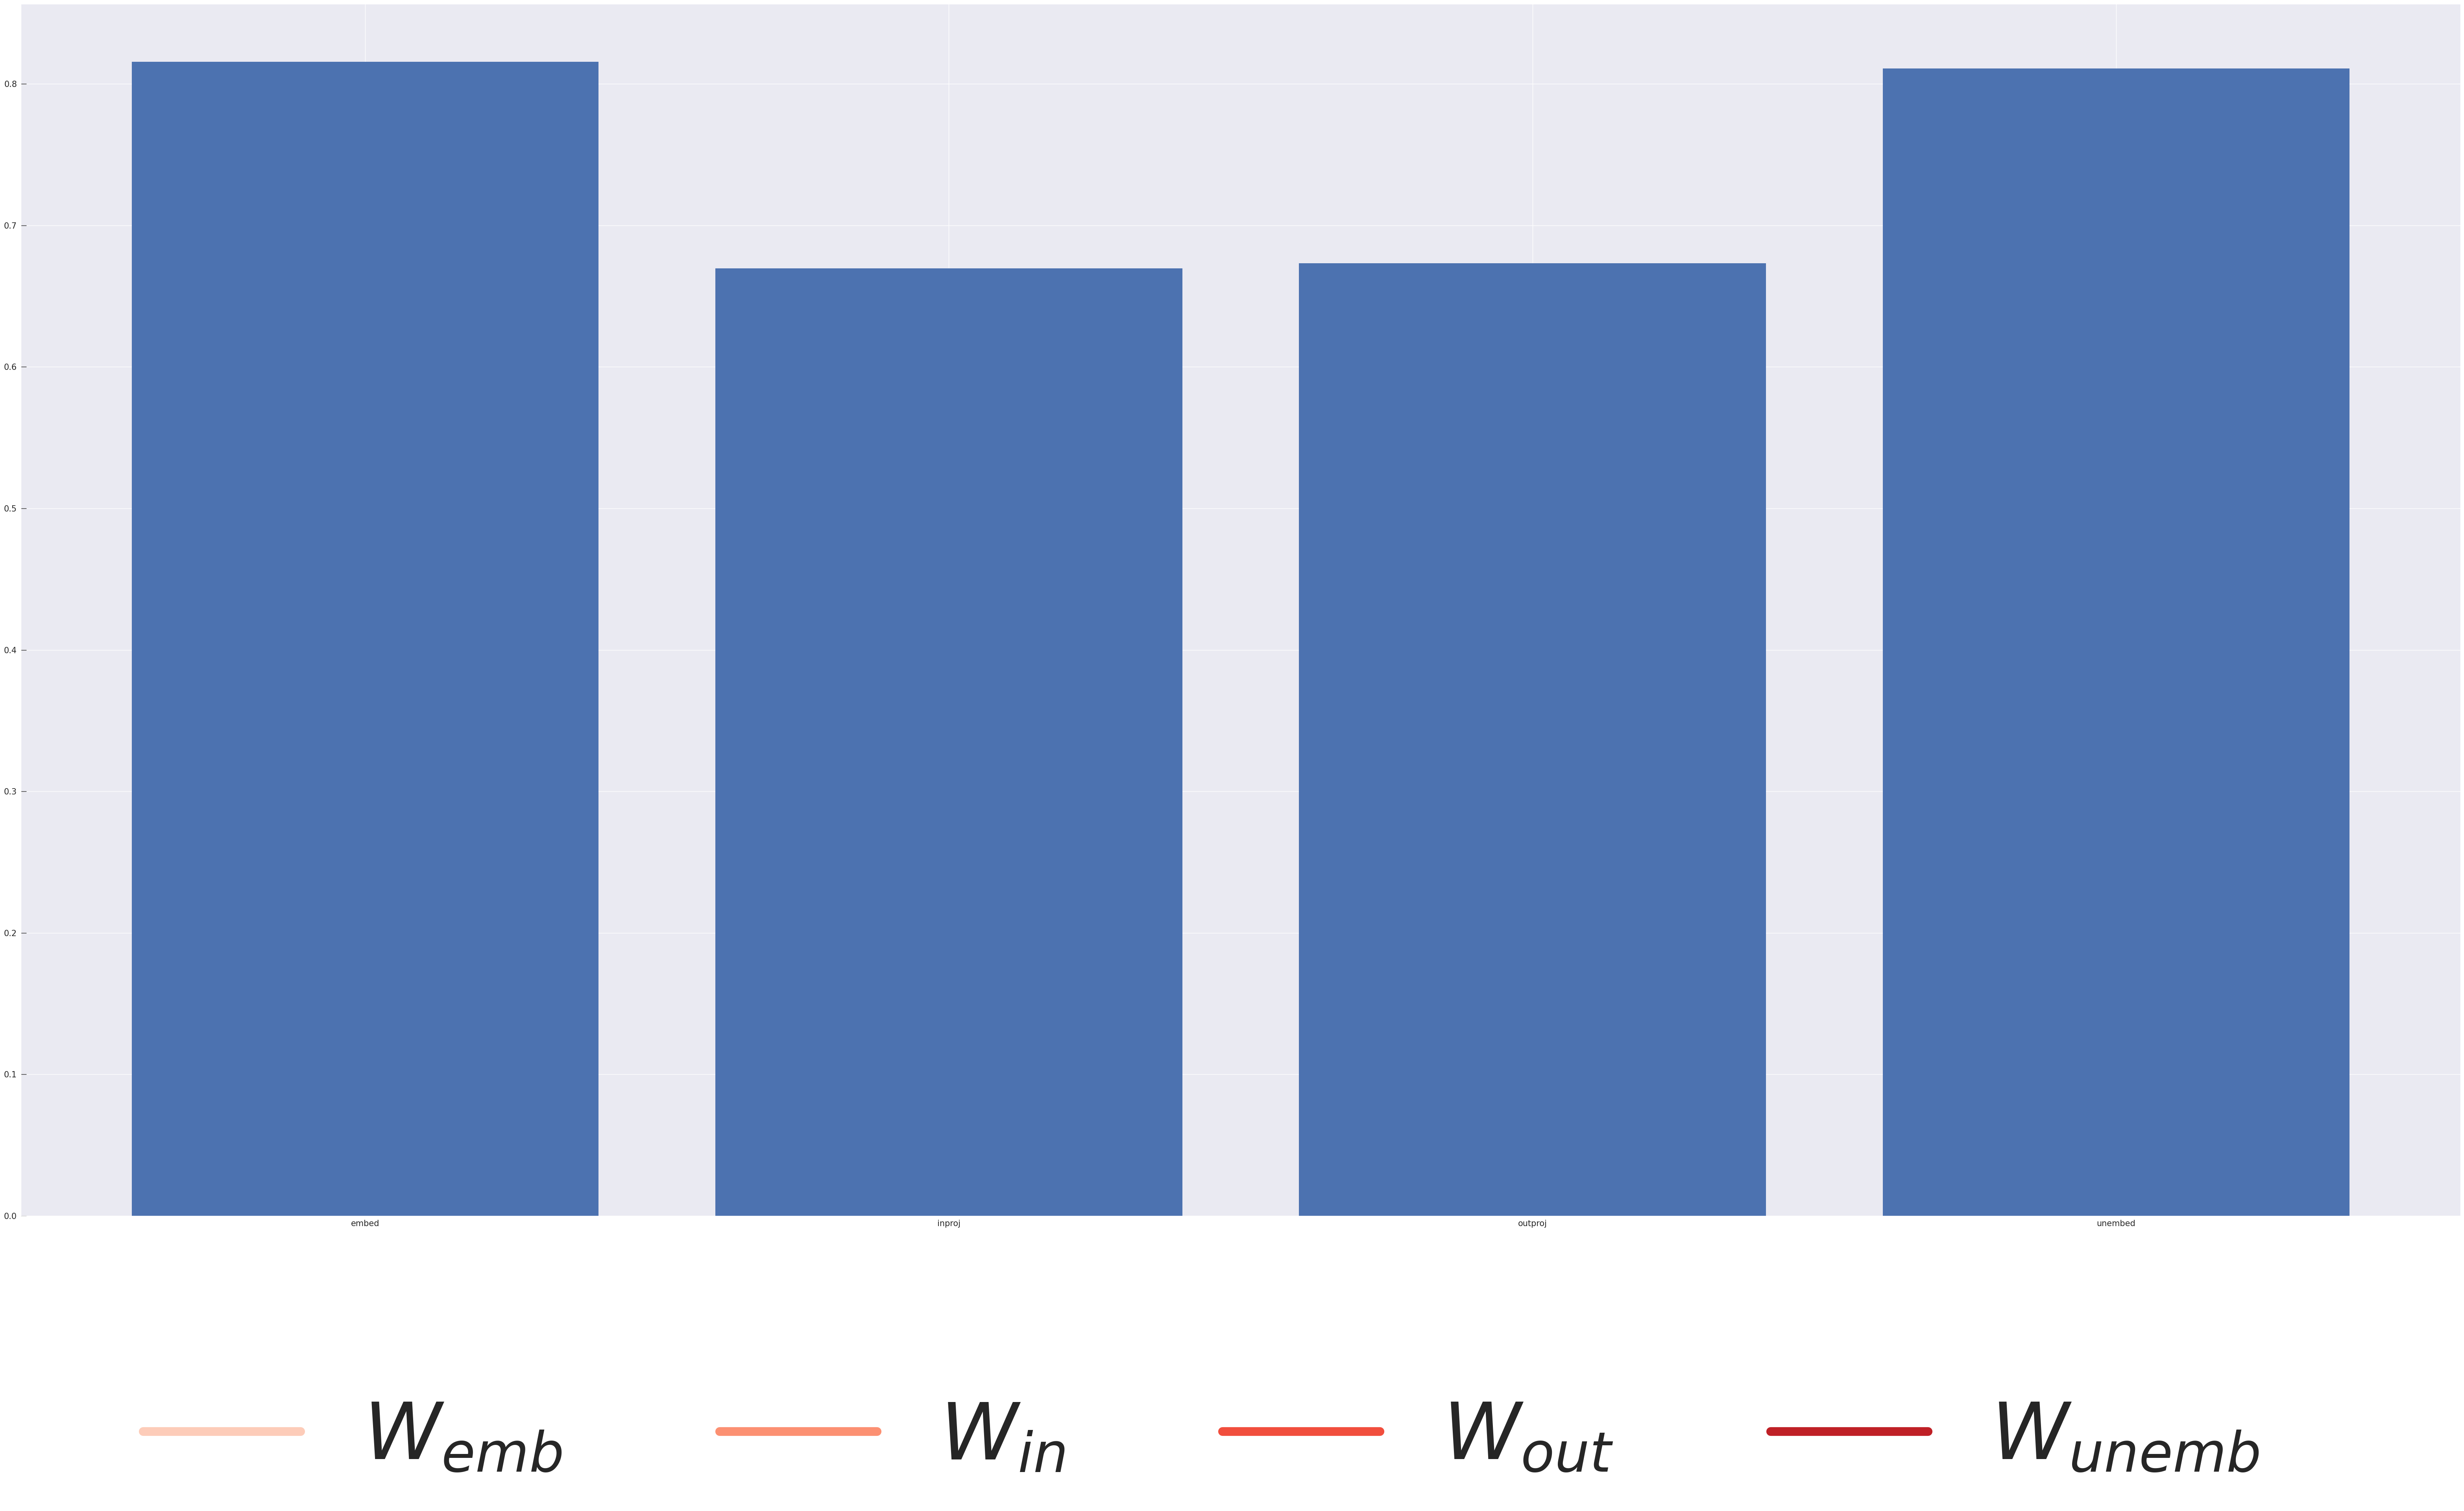

In [9]:
import torch
path = "/workspace/Grokking-Tickets/20240516/multiarith/add_multi/jaccard_distance_layer.pth"
scale = 8
jaccard_dis_layer = torch.load(path)
scale = 8
fig, ax = plt.subplots(1,1, figsize=(10*scale, 5*scale))
jd_dict_add_multi = {"embed":0, "inproj":0, "outproj":0, "unembed":0}
for layer_i, layer in enumerate(["embed", "inproj", "outproj", "unembed"]):
    jaccard_dis = jaccard_dis_layer[layer]
    grad_jaccard = [jaccard_dis[i][i+1] for i in range(len(jaccard_dis)-1)]
    jd_dict_add_multi[layer] = grad_jaccard

plt.bar(jd_dict_add_multi.keys(), [np.mean(jd_dict_add_multi[layer]) for layer in jd_dict_add_multi.keys()], yerr=[np.std(jd_dict_add_multi[layer]) for layer in jd_dict_add_multi.keys()], capsize=10*scale)
    # ax2 = ax[layer_i//2][layer_i%2].twinx()
    # ax2.plot(df1["Step"], df1["Grouped runs - test_acc"], "C1", label="Base model test accuracy", linewidth=3*scale)
# colorbar
# plt.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# cbar_ax.tick_params(labelsize=20*scale)
# fig.colorbar(ax[0][0].imshow(jaccard_dis_layer["embed"], cmap=cm.Blues, interpolation='nearest'), cax=cbar_ax, label="Jaccard distance", ticks=[0.0, 0.5, 1.0], format="%.1f", )
# colorbar label font size

# cbar_ax.set_label("Jaccard distance", labelsize=20*scale)
methods = [r"$W_{emb}$", r"$W_{in}$", r"$W_{out}$", r"$W_{unemb}$",]
colors = [ cm.Reds((i+1)/(4+1)) for i in range(4)] + ["C1"]
palette = dict(zip(methods, colors))
alphas = [0.95, 0.95, 0.95, 0.95, 0.95]
handles = [mpl.lines.Line2D([], [], color=palette[lab], alpha=alpha, linewidth=2*scale, label=lab) for lab, alpha in zip(methods, alphas)]
# fig.legend(handles=handles, ncol=4, frameon=False,fontsize=title_size, loc='upper center')
fig.legend(
    handles=handles,
    ncol=5,
    frameon=False,
    fontsize=18*scale,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1)
)
# ax.legend(fontsize=20*scale, loc="lower right",bbox_to_anchor=(0.95,0.1), title_fontsize=15, ncol=1)
# ax2.legend(fontsize=20*scale, loc="lower right",bbox_to_anchor=(1.0,0.0), title_fontsize=15, ncol=1)
# plt.legend(fontsize=20*scale, loc="lower right", title_fontsize=20*scale, ncol=1,)# bbox_to_anchor=(0,6))
# save one csv file grad jaccard
# for i in range(4):
#     layer = ["embed", "inproj", "outproj", "unembed"][i]
#     jaccard_dis = jaccard_dis_layer[layer]
#     grad_jaccard = [jaccard_dis[i][i+1] for i in range(len(jaccard_dis)-1)]
#     df = pd.DataFrame(grad_jaccard, columns=["grad_jaccard"]).T
#     df.to_csv(f"../ICML2024/fig/{layer}_grad_jaccard.csv", index=False)
# torch.save(jaccard_distance_layer, "/home/mask_sim/jaccard_distance_layer.pth")
# plt.savefig("jacard_distance.png")
# plt.show()




# plt.figure(figsize=(20,20))
# plt.imshow(jaccard_dis.numpy(), cmap=cm.jet, interpolation='nearest')
# plt.grid(False)
# plt.colorbar()
# plt.xticks(np.arange(len(total_masks)), total_masks.keys(), rotation=90, fontsize=30)
# plt.yticks(np.arange(len(total_masks)), total_masks.keys(), fontsize=30)
# #plt.title("Jaccard Distance", fontsize=４0)
# plt.savefig("jacard_distance.png")
# plt.show()

# os.makedirs("/home/mask_sim", exist_ok=True)
# np.save("/home/mask_sim/jacard_distance.npy", jaccard_dis.numpy())

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

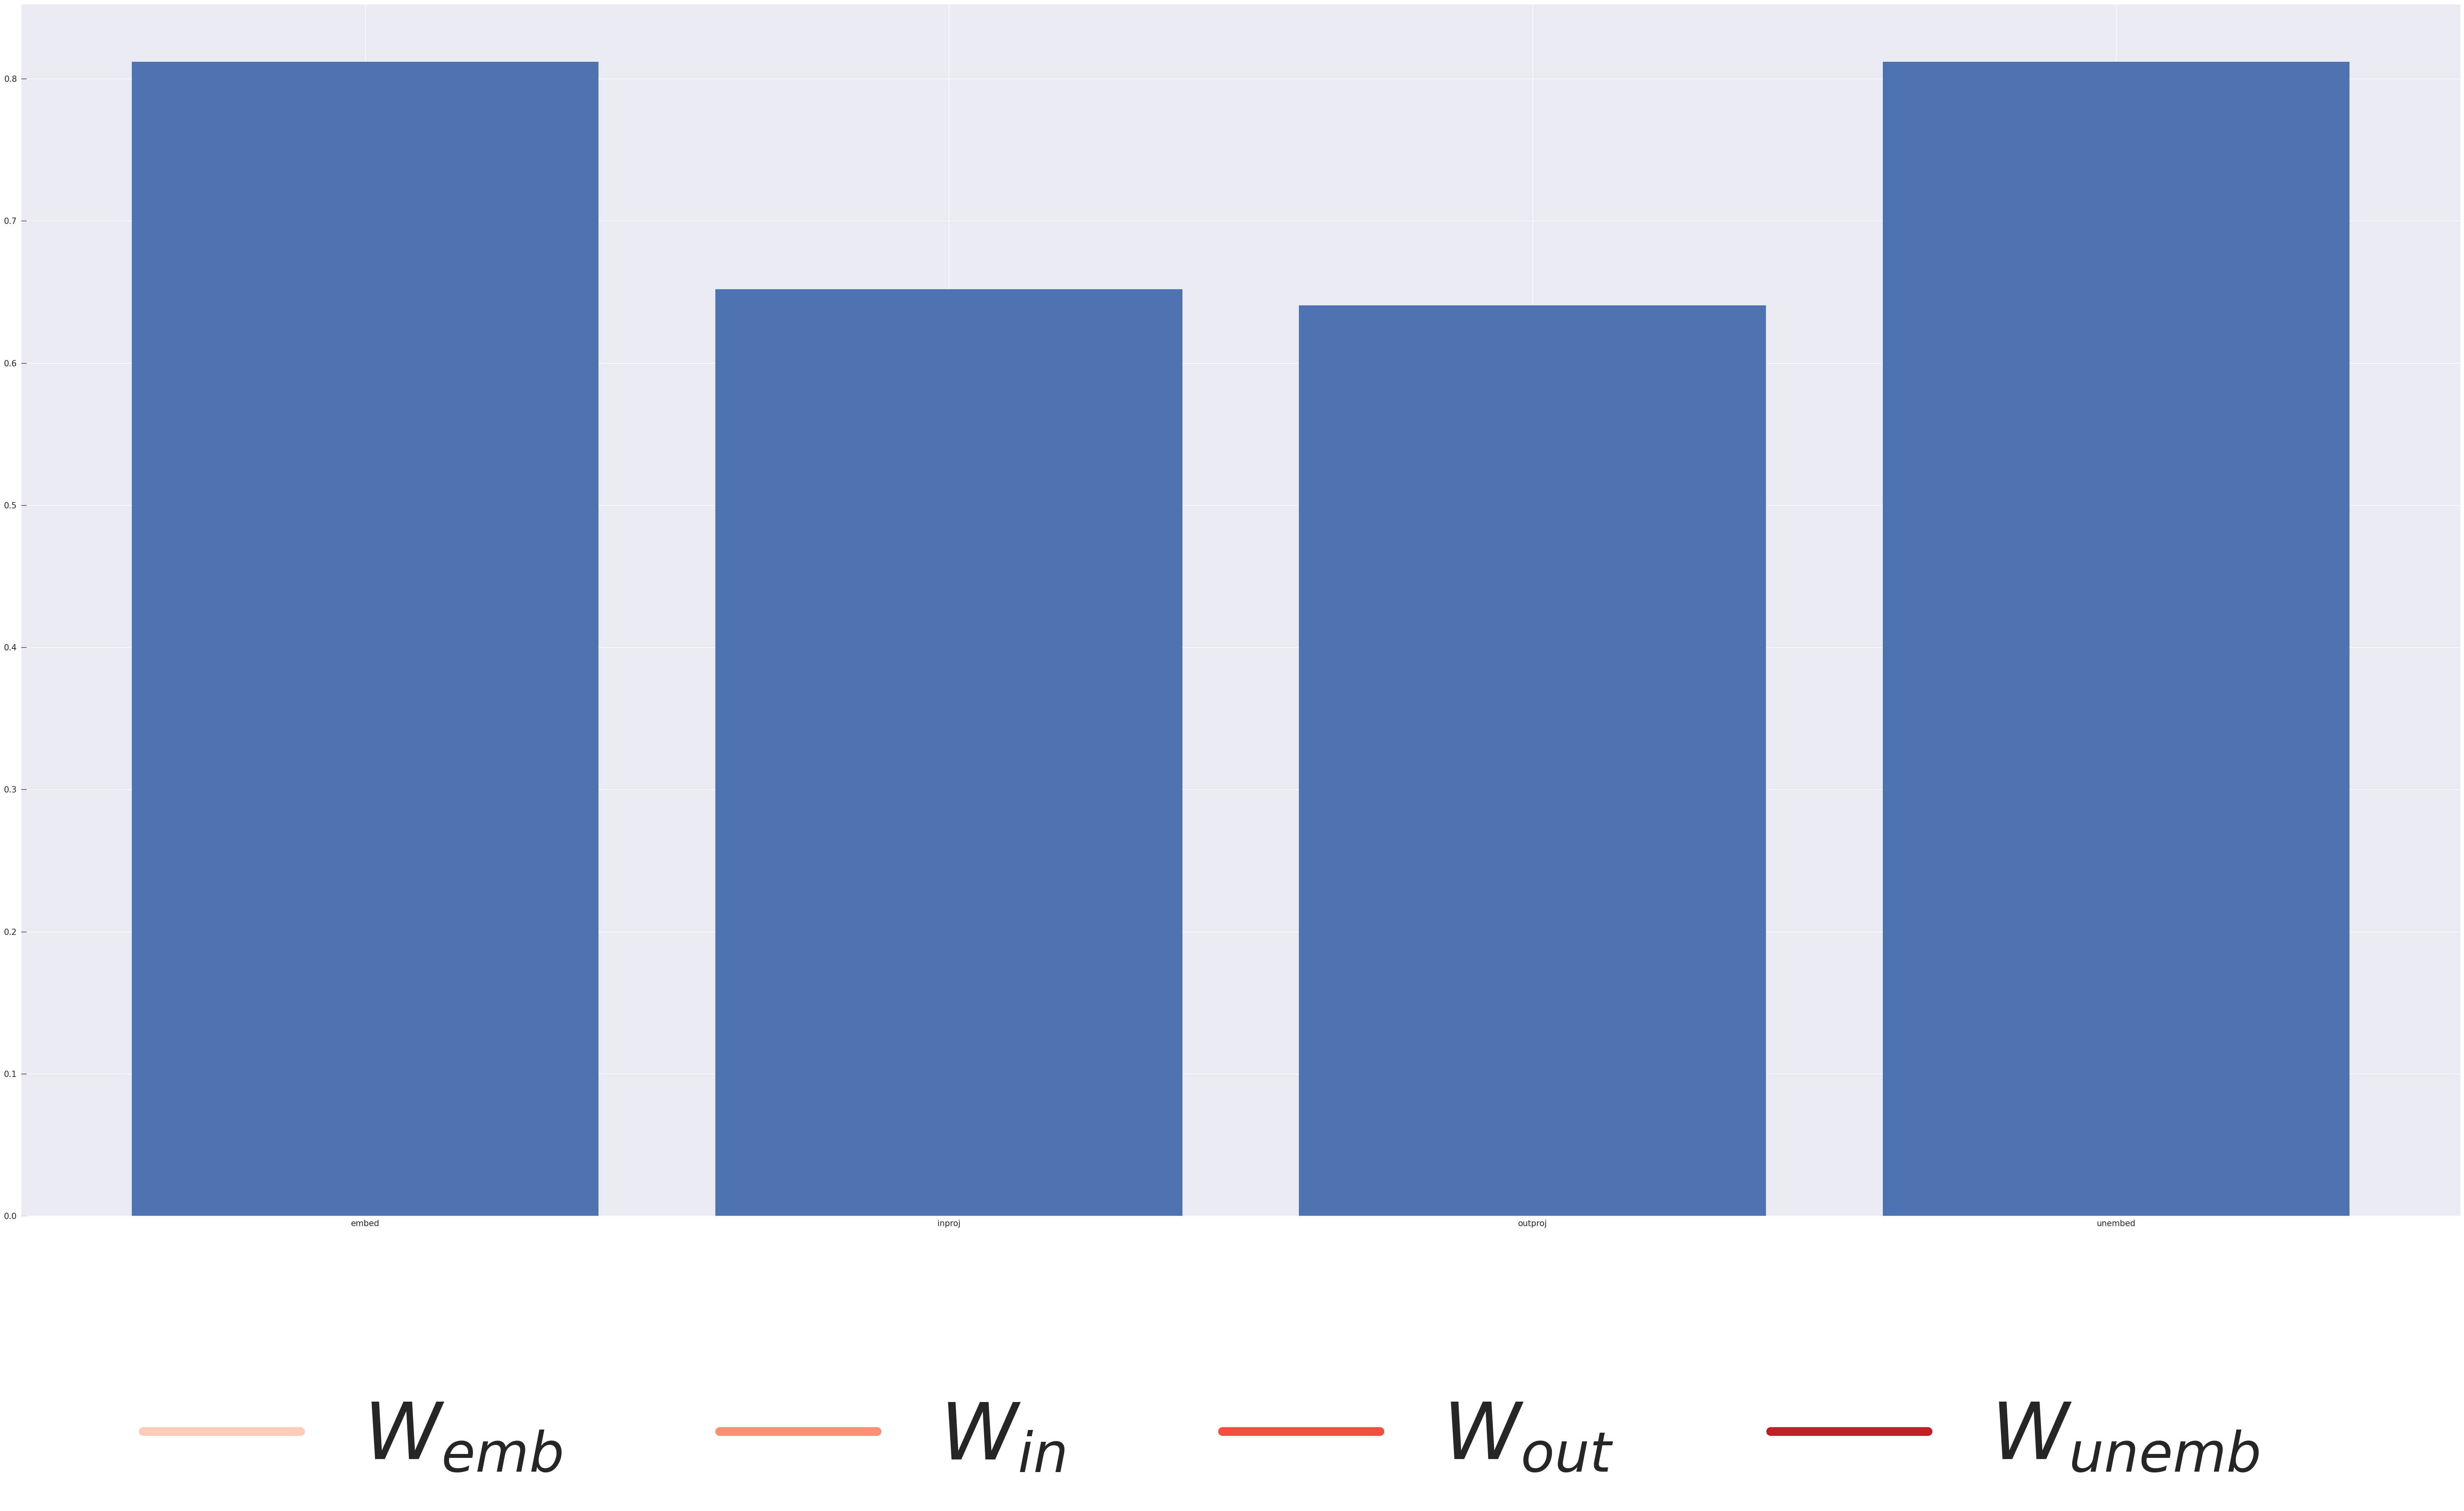

In [10]:
import torch
path = "/workspace/Grokking-Tickets/20240516/multiarith/add_sub/jaccard_distance_layer.pth"
scale = 8
jaccard_dis_layer = torch.load(path)
scale = 8
fig, ax = plt.subplots(1,1, figsize=(10*scale, 5*scale))
jd_dict_add_sub = {"embed":0, "inproj":0, "outproj":0, "unembed":0}
for layer_i, layer in enumerate(["embed", "inproj", "outproj", "unembed"]):
    jaccard_dis = jaccard_dis_layer[layer]
    grad_jaccard = [jaccard_dis[i][i+1] for i in range(len(jaccard_dis)-1)]
    jd_dict_add_sub[layer] = grad_jaccard

plt.bar(jd_dict_add_sub.keys(), [np.mean(jd_dict_add_sub[layer]) for layer in jd_dict_add_sub.keys()], yerr=[np.std(jd_dict_add_sub[layer]) for layer in jd_dict.keys()], capsize=10*scale)
    # ax2 = ax[layer_i//2][layer_i%2].twinx()
    # ax2.plot(df1["Step"], df1["Grouped runs - test_acc"], "C1", label="Base model test accuracy", linewidth=3*scale)
# colorbar
# plt.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# cbar_ax.tick_params(labelsize=20*scale)
# fig.colorbar(ax[0][0].imshow(jaccard_dis_layer["embed"], cmap=cm.Blues, interpolation='nearest'), cax=cbar_ax, label="Jaccard distance", ticks=[0.0, 0.5, 1.0], format="%.1f", )
# colorbar label font size

# cbar_ax.set_label("Jaccard distance", labelsize=20*scale)
methods = [r"$W_{emb}$", r"$W_{in}$", r"$W_{out}$", r"$W_{unemb}$",]
colors = [ cm.Reds((i+1)/(4+1)) for i in range(4)] + ["C1"]
palette = dict(zip(methods, colors))
alphas = [0.95, 0.95, 0.95, 0.95, 0.95]
handles = [mpl.lines.Line2D([], [], color=palette[lab], alpha=alpha, linewidth=2*scale, label=lab) for lab, alpha in zip(methods, alphas)]
# fig.legend(handles=handles, ncol=4, frameon=False,fontsize=title_size, loc='upper center')
fig.legend(
    handles=handles,
    ncol=5,
    frameon=False,
    fontsize=18*scale,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1)
)
# ax.legend(fontsize=20*scale, loc="lower right",bbox_to_anchor=(0.95,0.1), title_fontsize=15, ncol=1)
# ax2.legend(fontsize=20*scale, loc="lower right",bbox_to_anchor=(1.0,0.0), title_fontsize=15, ncol=1)
# plt.legend(fontsize=20*scale, loc="lower right", title_fontsize=20*scale, ncol=1,)# bbox_to_anchor=(0,6))
# save one csv file grad jaccard
# for i in range(4):
#     layer = ["embed", "inproj", "outproj", "unembed"][i]
#     jaccard_dis = jaccard_dis_layer[layer]
#     grad_jaccard = [jaccard_dis[i][i+1] for i in range(len(jaccard_dis)-1)]
#     df = pd.DataFrame(grad_jaccard, columns=["grad_jaccard"]).T
#     df.to_csv(f"../ICML2024/fig/{layer}_grad_jaccard.csv", index=False)
# torch.save(jaccard_distance_layer, "/home/mask_sim/jaccard_distance_layer.pth")
# plt.savefig("jacard_distance.png")
# plt.show()




# plt.figure(figsize=(20,20))
# plt.imshow(jaccard_dis.numpy(), cmap=cm.jet, interpolation='nearest')
# plt.grid(False)
# plt.colorbar()
# plt.xticks(np.arange(len(total_masks)), total_masks.keys(), rotation=90, fontsize=30)
# plt.yticks(np.arange(len(total_masks)), total_masks.keys(), fontsize=30)
# #plt.title("Jaccard Distance", fontsize=４0)
# plt.savefig("jacard_distance.png")
# plt.show()

# os.makedirs("/home/mask_sim", exist_ok=True)
# np.save("/home/mask_sim/jacard_distance.npy", jaccard_dis.numpy())

<BarContainer object of 4 artists>

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

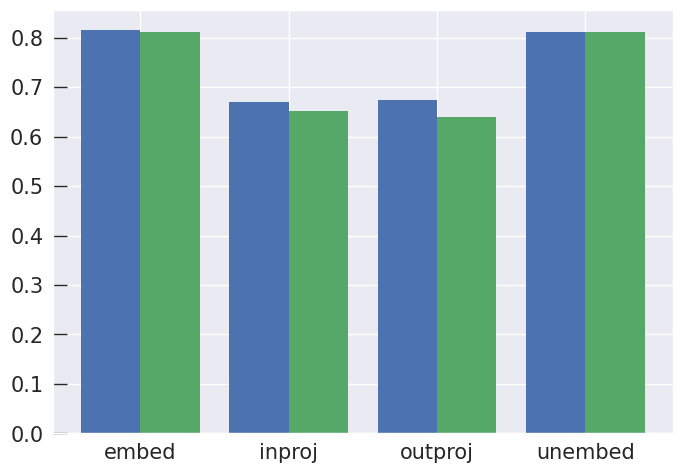

In [13]:
plt.bar(jd_dict_add_multi.keys(), [np.mean(jd_dict_add_multi[layer]) for layer in jd_dict_add_multi.keys()], yerr=[np.std(jd_dict_add_multi[layer]) for layer in jd_dict_add_multi.keys()], capsize=10*scale, width=-0.4, align="edge")
plt.bar(jd_dict_add_sub.keys(), [np.mean(jd_dict_add_sub[layer]) for layer in jd_dict_add_sub.keys()], yerr=[np.std(jd_dict_add_sub[layer]) for layer in jd_dict_add_sub.keys()], capsize=10*scale, width=0.4, align="edge")

## Mask Distance chane 

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

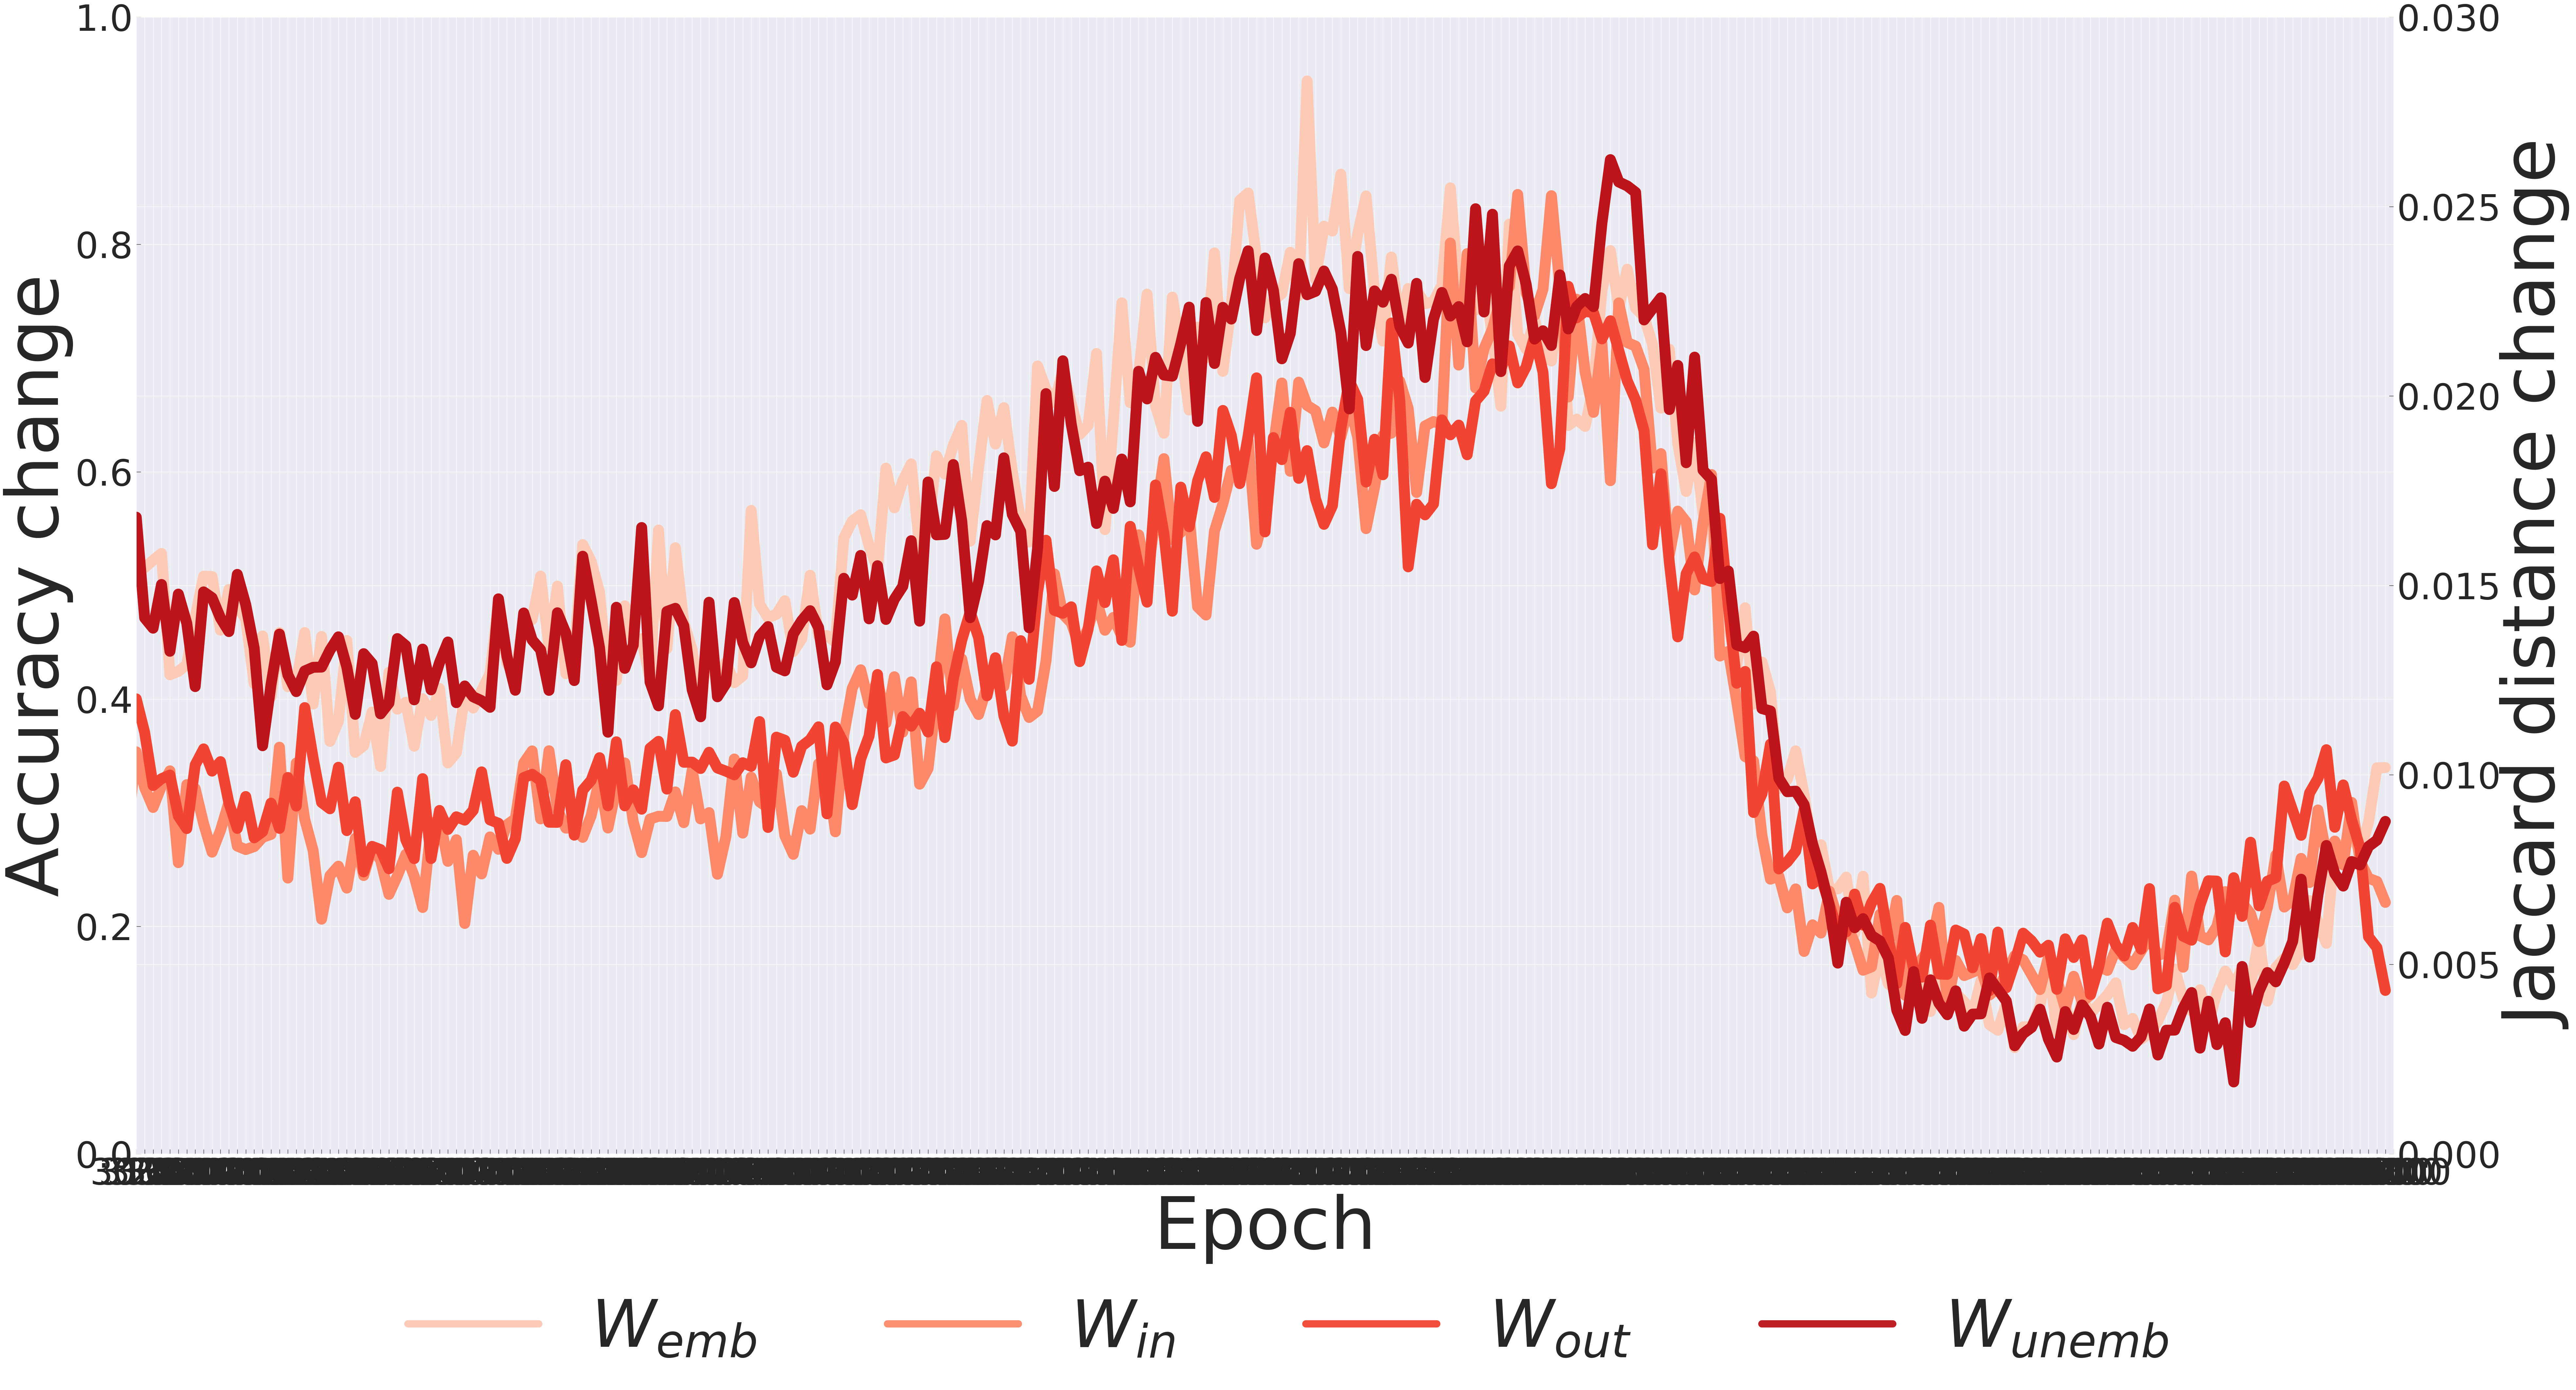

In [26]:
import torch
path = "/workspace/Grokking-Tickets/20240517/ticket/jaccard_distance_layer.pth"
scale = 8
jaccard_dis_layer = torch.load(path)
# print(jaccard_dis_layer["embed"].shape)
epochs = np.arange(0, jaccard_dis_layer["embed"].shape[0]*100, 100)
scale = 8
fig, ax = plt.subplots(1,1, figsize=(10*scale, 5*scale))
# df1 = pd.read_csv("/Users/gouki.minegishi/TMI/re/grokking-tickets/ICLR2024/data2/exp0_mlp_test.csv", header=0)
# df1 = df1[df1["Step"].isin(epochs)]
# the difference between consecutive epochs
# df1 = pd.DataFrame([df1.iloc[i+1] - df1.iloc[i] for i in range(len(df1)-1)])
# ax.plot(epochs, df1["Grouped runs - test_acc"],"C1", label="Test accuracy", linewidth=3*scale)
ax2 = ax.twinx()
for layer_i, layer in enumerate(["embed", "inproj", "outproj", "unembed"]):
    jaccard_dis = jaccard_dis_layer[layer]
    grad_jaccard = [jaccard_dis[i][i+1] for i in range(len(jaccard_dis)-1)]
    ax2.plot(epochs[:-1], grad_jaccard, label="Jaccard distance between consecutive epochs", linewidth=3*scale, c=cm.Reds((layer_i+1)/(4+1)))
ax2.set_xticks(epochs)
ax2.set_xticklabels(epochs)#, rotation=90)
ax2.tick_params(labelsize=10*scale)
ax.tick_params(labelsize=10*scale)
ax.set_xlim(3000, epochs[-1])
ax2.set_xlim(3000, epochs[-1])
ax2.set_ylim(0, 0.03)
    # test accuracy
    # ax2 = ax[layer_i//2][layer_i%2].twinx()
    # ax2.plot(df1["Step"], df1["Grouped runs - test_acc"], "C1", label="Base model test accuracy", linewidth=3*scale)
# colorbar
# plt.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# cbar_ax.tick_params(labelsize=20*scale)
# fig.colorbar(ax[0][0].imshow(jaccard_dis_layer["embed"], cmap=cm.Blues, interpolation='nearest'), cax=cbar_ax, label="Jaccard distance", ticks=[0.0, 0.5, 1.0], format="%.1f", )
# colorbar label font size

# cbar_ax.set_label("Jaccard distance", labelsize=20*scale)
methods = [r"$W_{emb}$", r"$W_{in}$", r"$W_{out}$", r"$W_{unemb}$",]
colors = [ cm.Reds((i+1)/(4+1)) for i in range(4)] + ["C1"]
palette = dict(zip(methods, colors))
alphas = [0.95, 0.95, 0.95, 0.95, 0.95]
handles = [mpl.lines.Line2D([], [], color=palette[lab], alpha=alpha, linewidth=2*scale, label=lab) for lab, alpha in zip(methods, alphas)]
# fig.legend(handles=handles, ncol=4, frameon=False,fontsize=title_size, loc='upper center')
fig.legend(
    handles=handles,
    ncol=5,
    frameon=False,
    fontsize=18*scale,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1)
)
# ax.legend(fontsize=20*scale, loc="lower right",bbox_to_anchor=(0.95,0.1), title_fontsize=15, ncol=1)
# ax2.legend(fontsize=20*scale, loc="lower right",bbox_to_anchor=(1.0,0.0), title_fontsize=15, ncol=1)
# plt.legend(fontsize=20*scale, loc="lower right", title_fontsize=20*scale, ncol=1,)# bbox_to_anchor=(0,6))
ax.set_xlabel('Epoch', fontsize=20*scale)
ax.set_ylabel('Accuracy change', fontsize=20*scale)
ax2.set_ylabel('Jaccard distance change', fontsize=20*scale)
ax.tick_params(labelsize=10*scale)# which="both", left=False, right=False, labelright=True, labelleft=False)
ax2.tick_params(labelsize=10*scale, axis="y",) #which="both", left=False, right=False, labelright=True, labelleft=False)
fig.tight_layout()
# plt.savefig("../ICML2024/fig/jaccard_layer_gradual.pdf", bbox_inches="tight", dpi=300)

# save one csv file grad jaccard
# for i in range(4):
#     layer = ["embed", "inproj", "outproj", "unembed"][i]
#     jaccard_dis = jaccard_dis_layer[layer]
#     grad_jaccard = [jaccard_dis[i][i+1] for i in range(len(jaccard_dis)-1)]
#     df = pd.DataFrame(grad_jaccard, columns=["grad_jaccard"]).T
#     df.to_csv(f"../ICML2024/fig/{layer}_grad_jaccard.csv", index=False)
# torch.save(jaccard_distance_layer, "/home/mask_sim/jaccard_distance_layer.pth")
# plt.savefig("jacard_distance.png")
# plt.show()




# plt.figure(figsize=(20,20))
# plt.imshow(jaccard_dis.numpy(), cmap=cm.jet, interpolation='nearest')
# plt.grid(False)
# plt.colorbar()
# plt.xticks(np.arange(len(total_masks)), total_masks.keys(), rotation=90, fontsize=30)
# plt.yticks(np.arange(len(total_masks)), total_masks.keys(), fontsize=30)
# #plt.title("Jaccard Distance", fontsize=４0)
# plt.savefig("jacard_distance.png")
# plt.show()

# os.makedirs("/home/mask_sim", exist_ok=True)
# np.save("/home/mask_sim/jacard_distance.npy", jaccard_dis.numpy())